# HIGH PASS FIR FILTER DESIGN USING BLACKMAN WINDOW

# FIR Filter Design without Inbuilt functions

In [7]:
import numpy as np
from matplotlib import pyplot as plt

# Filter parameters
fs = 1500  # Sampling frequency (Hz)
fc = 350   # Cutoff frequency (Hz)
N = 9      # Filter length

# Calculate normalized cutoff frequency
fc_norm = fc / fs

# Design Blackman window
def blackman_window(N):
    n = np.arange(N)
    return 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))

# Compute window coefficients
w = blackman_window(N)

# Design ideal frequency response of the filter
def ideal_highpass_response(N, fc_norm):
    h = np.zeros(N)
    for n in range(N):
        if n == N // 2:
            h[n] = 1 - 2 * fc_norm  # Impulse response at n=0
        else:
            h[n] = -(np.sin(2 * np.pi * fc_norm * (n - N // 2)) / (np.pi * (n - N // 2)))
    return h

# Compute ideal frequency response
H_ideal = ideal_highpass_response(N, fc_norm)

# Multiply ideal response by window coefficients to obtain filter coefficients
h = H_ideal * w

print("Filter Coefficients:",np.round(h, decimals=3))




Filter Coefficients: [-0.     0.007 -0.011 -0.245  0.533 -0.245 -0.011  0.007 -0.   ]


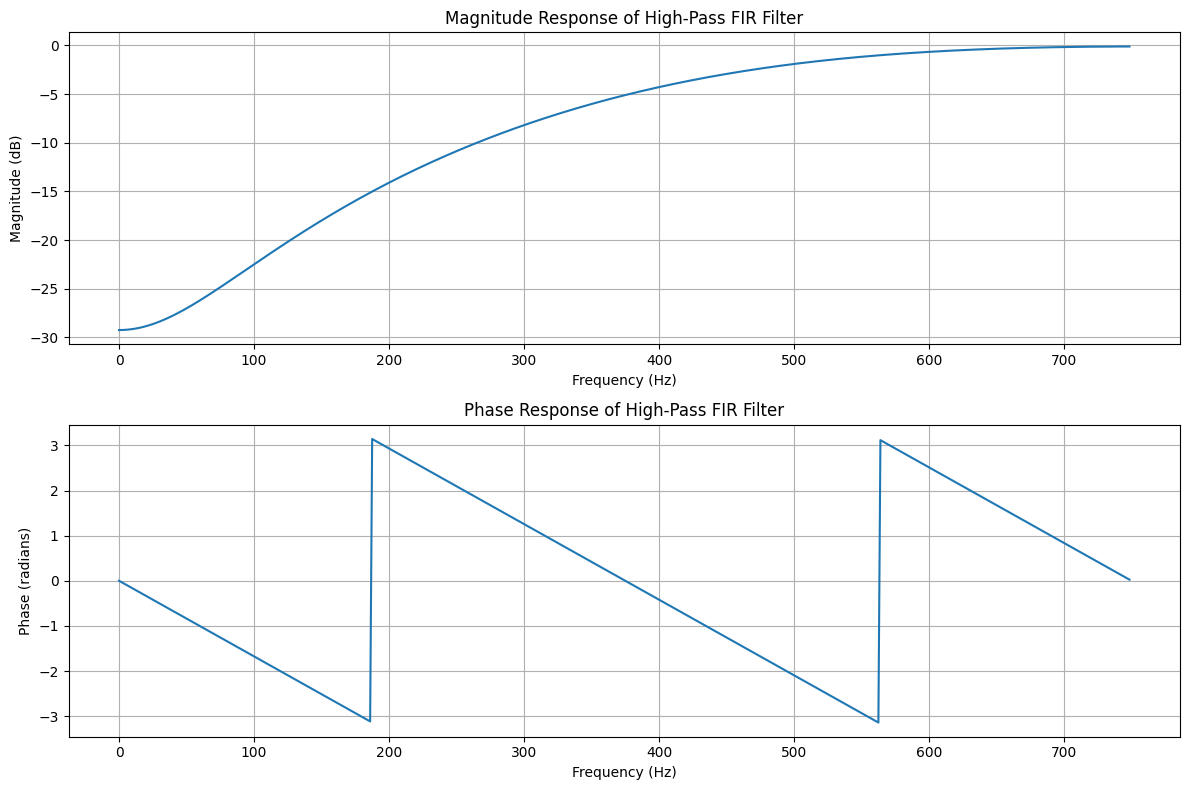

In [8]:
def freq_response(h, fs, N_fft=1000):
    freq_response = np.zeros(N_fft, dtype=complex)
    freq_axis = np.linspace(0, fs, N_fft, endpoint=False)

    # Calculate DFT manually
    for k in range(N_fft):
        for n in range(len(h)):
            freq_response[k] += h[n] * np.exp(-1j * 2 * np.pi * k * n / N_fft)

    # Convert frequency response to magnitude in decibels
    magnitude_response = 20 * np.log10(np.abs(freq_response))
    # Calculate phase response
    phase_response = np.angle(freq_response)
    return freq_axis[:N_fft//2], magnitude_response[:N_fft//2], phase_response[:N_fft//2]

# Compute frequency response of the designed filter
freq_axis, magnitude_response, phase_response = freq_response(h, fs)

# Plot magnitude response
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(freq_axis, magnitude_response)
plt.title('Magnitude Response of High-Pass FIR Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Plot phase response
plt.subplot(2, 1, 2)
plt.plot(freq_axis, phase_response)
plt.title('Phase Response of High-Pass FIR Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Applying Filter to the given composite signal without using Inbuilt functions

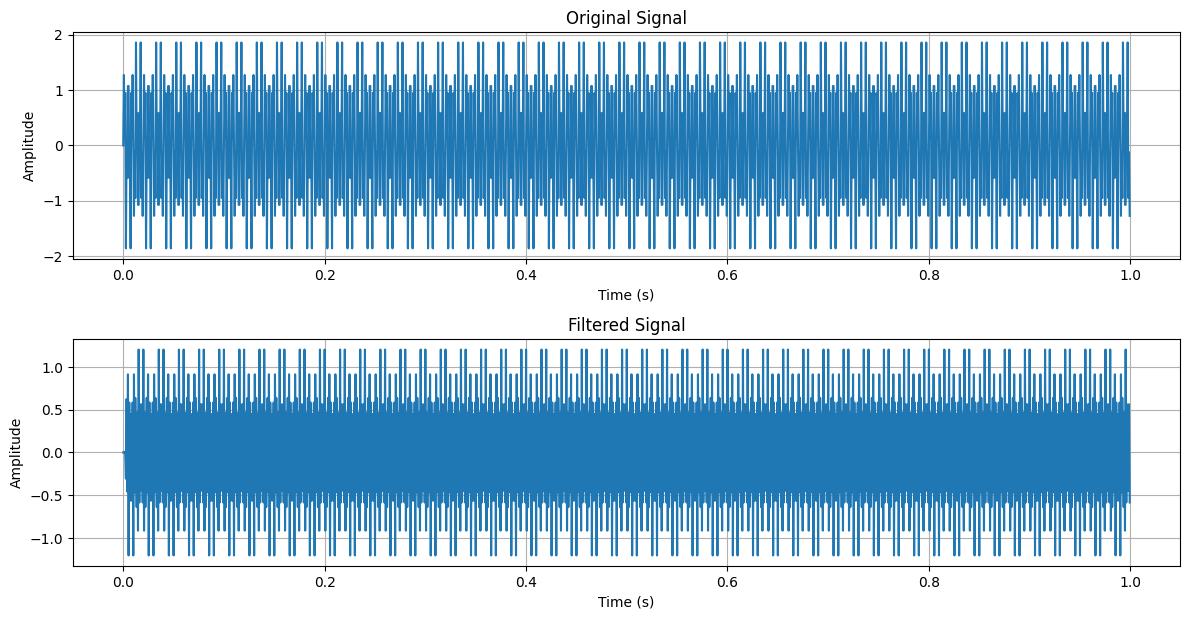

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define filter specifications
fs = 1500  # Sampling frequency
fc = 350   # Cutoff frequency
N = 9      # Filter length


# Generate composite signal
t = np.arange(0, 1, 1/fs)
signal = np.sin(2 * np.pi * 250 * t) + np.sin(2 * np.pi * 650 * t)

# Perform convolution manually
filtered_signal = np.zeros_like(signal)
for n in range(len(signal)):
    for k in range(N):
        if n - k >= 0:
            filtered_signal[n] += h[k] * signal[n - k]

# Compute frequency response of the original signal
N_orig = len(signal)
freq_original = np.linspace(0, fs/2, N_orig//2)
#Using DFT
signal_freq = np.zeros(N_orig//2, dtype=complex)
for k in range(N_orig//2):
    for n in range(N_orig):
        signal_freq[k] += signal[n] * np.exp(-2j * np.pi * k * n / N_orig)

freq_response_original = np.abs(signal_freq)

# Compute frequency response of the filtered signal
N_filtered = len(filtered_signal)
freq_filtered = np.linspace(0, fs/2, N_filtered//2)
#Using DFT
filtered_signal_freq = np.zeros(N_filtered//2, dtype=complex)
for k in range(N_filtered//2):
    for n in range(N_filtered):
        filtered_signal_freq[k] += filtered_signal[n] * np.exp(-2j * np.pi * k * n / N_filtered)

freq_response_filtered = np.abs(filtered_signal_freq)
plt.figure(figsize=(12, 12))
# Plot original signal
plt.subplot(4, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
#plt.xlim([0,0.050])
plt.ylabel('Amplitude')
plt.grid(True)

# Plot filtered signal
plt.subplot(4, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time (s)')
#plt.xlim([0,0.050])
plt.ylabel('Amplitude')
plt.grid(True)


plt.tight_layout()
plt.show()


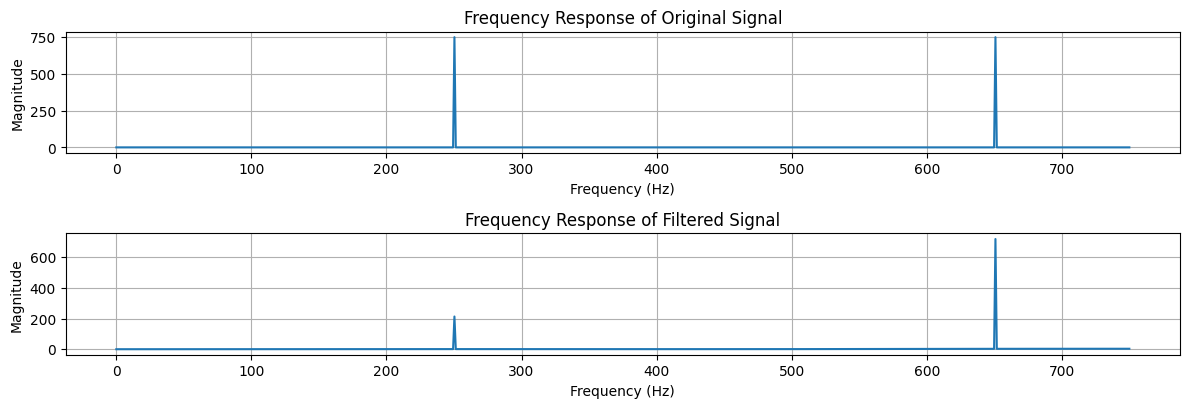

In [11]:
# Plot frequency response of the original signal
plt.figure(figsize=(12,8))
plt.subplot(4, 1, 3)
plt.plot(freq_original, freq_response_original)
plt.title('Frequency Response of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

# Plot frequency response of the filtered signal
plt.subplot(4, 1, 4)
plt.plot(freq_filtered, freq_response_filtered)
plt.title('Frequency Response of Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()

# FIR Filter Design using Inbuilt Functions

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Define filter specifications
fs = 1500  # Sampling frequency
fc = 350   # Cutoff frequency
N = 9      # Filter length

# Design FIR filter using Blackman window method
h1 = firwin(N, fc / (fs / 2), pass_zero=False, window='blackman')
print('FIR filter Coefficients:', np.round(h, decimals=3))


FIR filter Coefficients: [-0.     0.007 -0.011 -0.245  0.533 -0.245 -0.011  0.007 -0.   ]


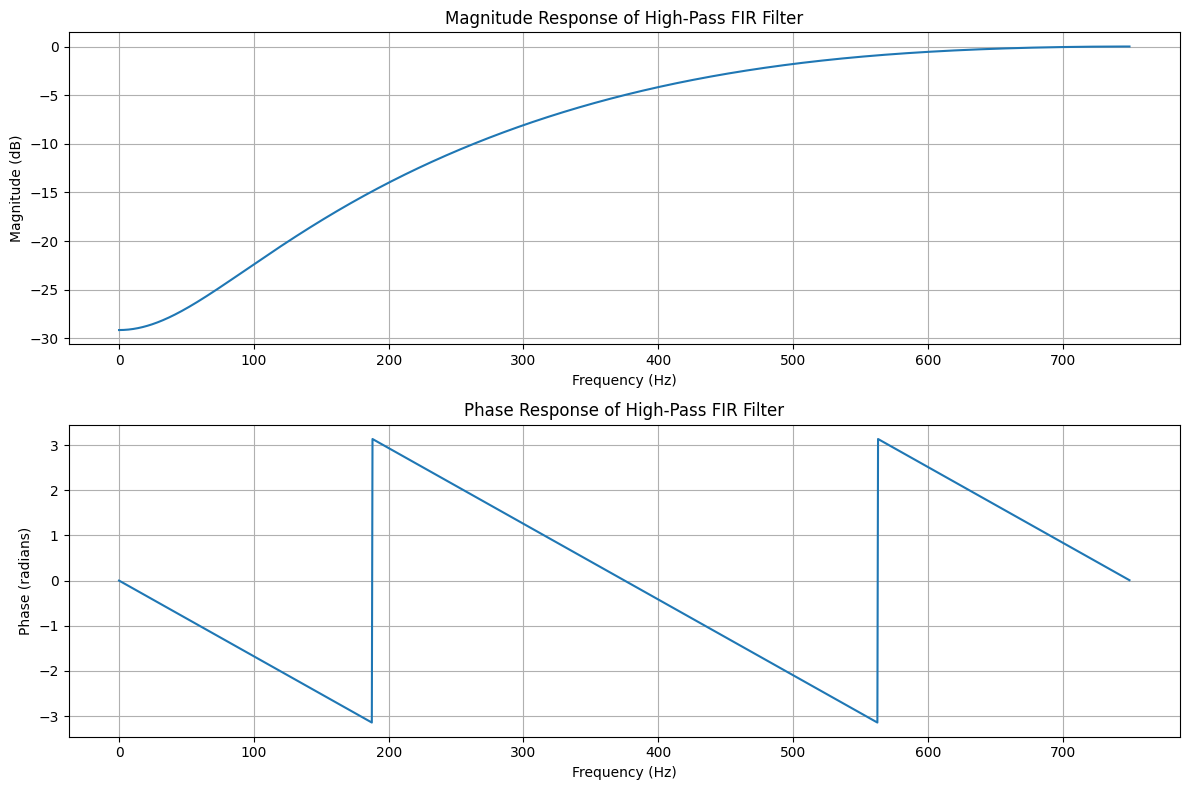

In [12]:
# Compute frequency response using scipy.signal.freqz
freq_response = freqz(h1, worN=1500, fs=fs)

plt.figure(figsize=(12, 8))

# Extract frequency, magnitude, and phase response
freq_axis = freq_response[0]
magnitude_response = 20 * np.log10(np.abs(freq_response[1]))
phase_response = np.angle(freq_response[1])

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(freq_axis, magnitude_response)
plt.title('Magnitude Response of High-Pass FIR Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Plot phase response
plt.subplot(2, 1, 2)
plt.plot(freq_axis, phase_response)
plt.title('Phase Response of High-Pass FIR Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Applying Filter to the given composite signal using Inbuilt functions

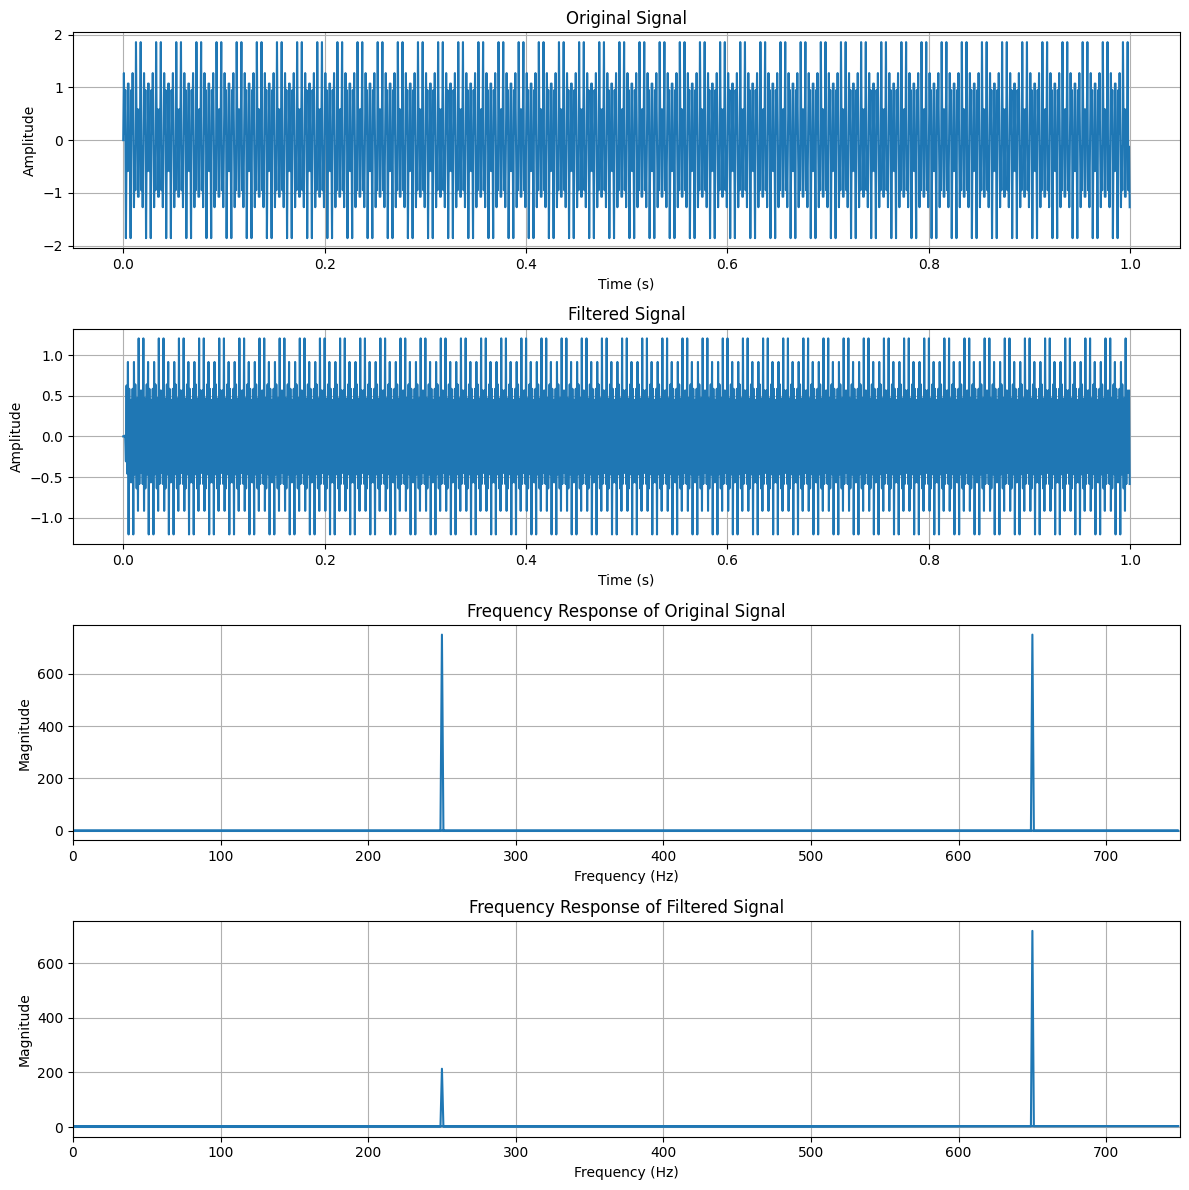

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz

# Define filter specifications
fs = 1500  # Sampling frequency
fc = 350   # Cutoff frequency
N = 9      # Filter length

# Generate composite signal
t = np.arange(0, 1, 1/fs)
signal = np.sin(2 * np.pi * 250 * t) + np.sin(2 * np.pi * 650 * t)

# Apply filter to the signal
filtered_signal = lfilter(h, 1, signal)

# Compute frequency response of the original signal
freq_response_original = np.fft.fft(signal)
freq_response_mag_original = np.abs(freq_response_original)
freq_original = np.fft.fftfreq(len(signal), 1/fs)

# Compute frequency response of the filtered signal
freq_response_filtered = np.fft.fft(filtered_signal)
freq_response_mag_filtered = np.abs(freq_response_filtered)
freq_filtered = np.fft.fftfreq(len(filtered_signal), 1/fs)

# Plot frequency response of the filter, original signal, and filtered signal
plt.figure(figsize=(12, 12))

# Plot original signal in time domain
plt.subplot(4, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot filtered signal in time domain
plt.subplot(4, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot frequency response of the original signal
plt.subplot(4, 1, 3)
plt.plot(freq_original, freq_response_mag_original)
plt.title('Frequency Response of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.xlim(0, fs/2)  # Limit the x-axis to positive frequencies

# Plot frequency response of the filtered signal
plt.subplot(4, 1, 4)
plt.plot(freq_filtered, freq_response_mag_filtered)
plt.title('Frequency Response of Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.xlim(0, fs/2)  # Limit the x-axis to positive frequencies

plt.tight_layout()
plt.show()


CONVERSION OF SINE DATA SAMPLES INTO DIGITAL FORM TO USE IN VERILOG TESTBENCH AS INPUT DATA

Text file for composite signal finished
Text file for scaled composite signal finished


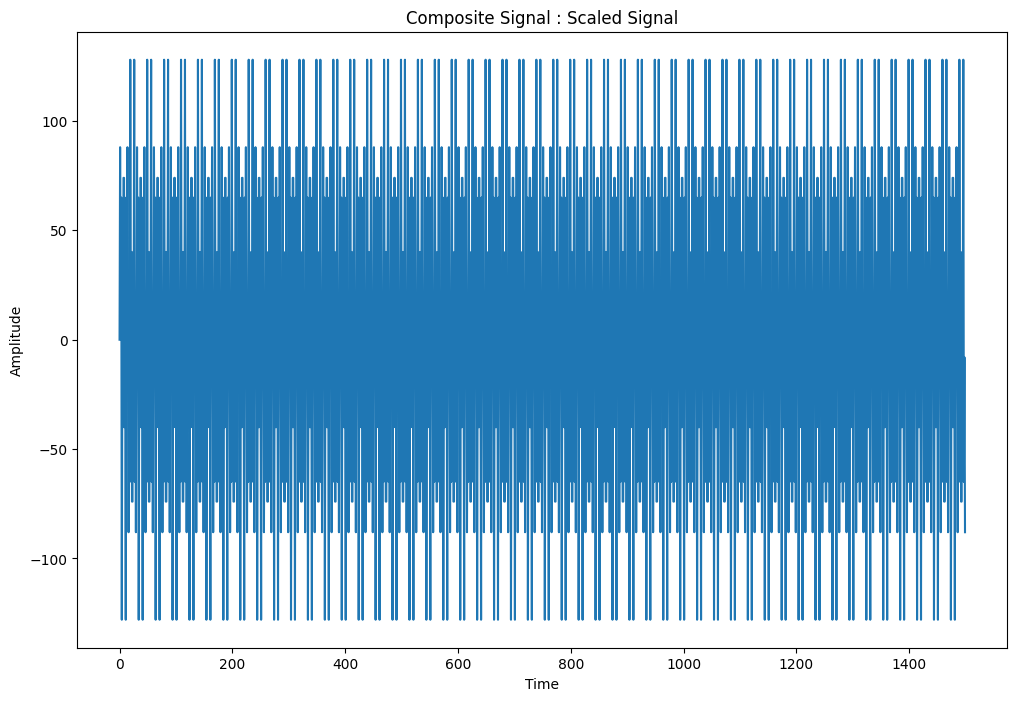

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1500  # Sampling frequency
duration = 1 # Duration of the signal in seconds

# Time vector
t = np.arange(0, duration, 1/fs)

# Generate signals
freq1 = 250
freq2 = 650
signal1 = np.sin(2 * np.pi * freq1 * t)
signal2 = np.sin(2 * np.pi * freq2 * t)

# Composite signal
composite_signal = signal1 + signal2

# Normalize the composite signal
composite_signal /= np.max(np.abs(composite_signal))


# Save the composite signal to a text file
with open('composite_signal.data', 'w') as f:
    for val in composite_signal:
        f.write(f'{val}\n')

print('Text file for composite signal finished')

# Convert from real to integers
total_wordlength = 16
scaling = 7
composite_signal_integers = np.round(composite_signal * (2**scaling))

# Plot scaled signal
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(composite_signal_integers)), composite_signal_integers)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Composite Signal : Scaled Signal')

# Convert from integers to binary
composite_signal_integers = composite_signal_integers.astype(int)
composite_signal_in_binary_signed = np.array([np.binary_repr(x % (2**total_wordlength), width=total_wordlength) for x in composite_signal_integers])
with open('signal.data', 'w') as f:
    for val in composite_signal_in_binary_signed:
        f.write(f'{val}\n')

print('Text file for scaled composite signal finished')

